Time Series Data : It refers to data that is collected, recorded or observed over time in a sequential order.

Characteristics:
 * Chronological Order: Observations are ordered in time (D,W,M,Y,s,m,h)
 * Sequential Dependancy : The order of the data matters because previous values can influence or predict the future values.
 * Temporal components: Trends, Seasonality, Cycle, noise

Time Series Analysis:
 * statistical technique: meaningful insights about pattern and trends
 * forecasting

Time Series Decomposition
 * Trend: long term direction
 * Seasonality: repeting pattern at fixed interval
 * Noise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col = 'Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

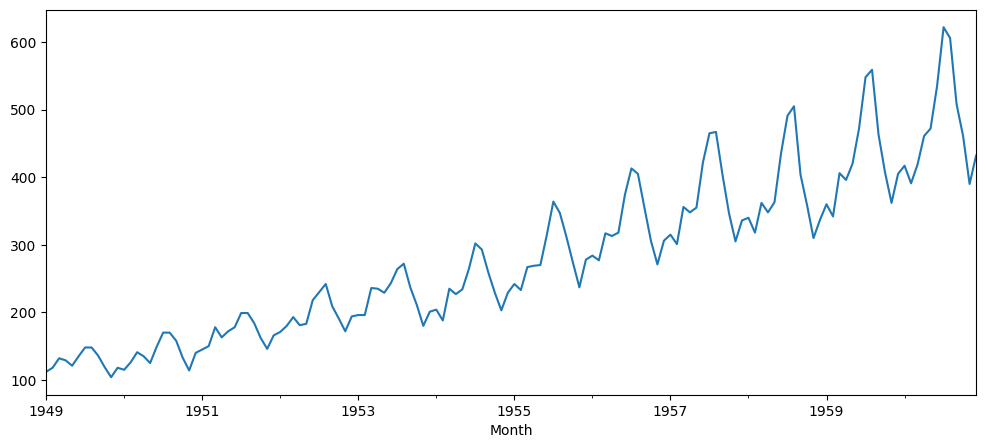

In [ ]:
df['Passengers'].plot(figsize=(12,5))

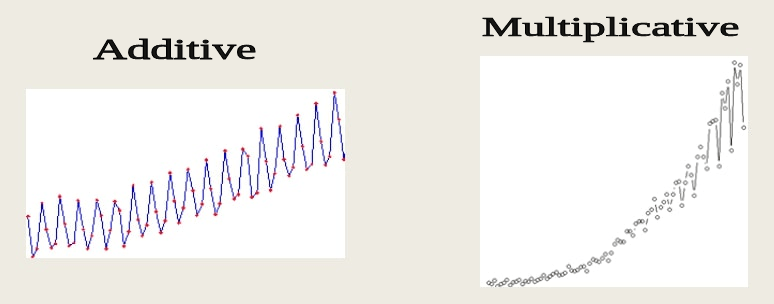


- Additive $ y_t = T_t + S_t + R_t$
- Multiplicative $ y_t = T_t * S_t * R_t$

In [ ]:
import yfinance as yf
ticker_symbol = "RELIANCE.NS"
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2025-08-01', interval='1d' )
stock_data.columns = stock_data.columns.droplevel("Ticker")
stock_data

/tmp/ipython-input-2753557596.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2025-08-01', interval='1d' )
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,1175.889648,1177.304802,1163.244669,1164.066352,5316175
2023-01-03,1167.284668,1174.565828,1163.062148,1170.936659,7658932
2023-01-04,1149.709595,1169.110728,1147.632506,1167.261851,9264891
2023-01-05,1147.655396,1157.858149,1143.067616,1151.969321,13637099
2023-01-06,1158.086304,1163.130627,1149.595501,1153.407240,6349597
...,...,...,...,...,...
2025-07-25,1386.163696,1395.426749,1378.593954,1393.335127,11854722
2025-07-28,1382.080078,1402.199795,1379.490445,1386.761454,7748361
2025-07-29,1411.462769,1414.550412,1377.498442,1377.498442,10750072


In [ ]:
type(stock_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Axes: xlabel='Date'>

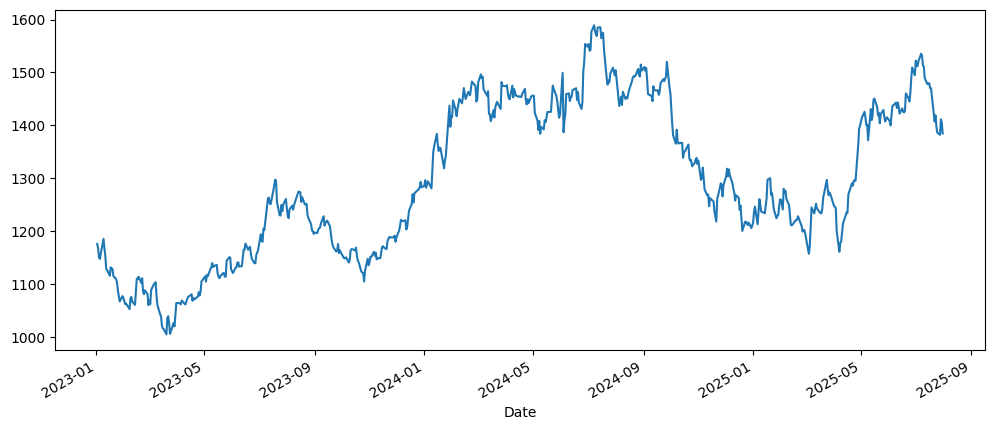

In [ ]:
stock_data['Close'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(df["Passengers"], model = 'multiplicative', period=10)

In [ ]:
trend = sd.trend
seasonal = sd.seasonal
residuals = sd.resid

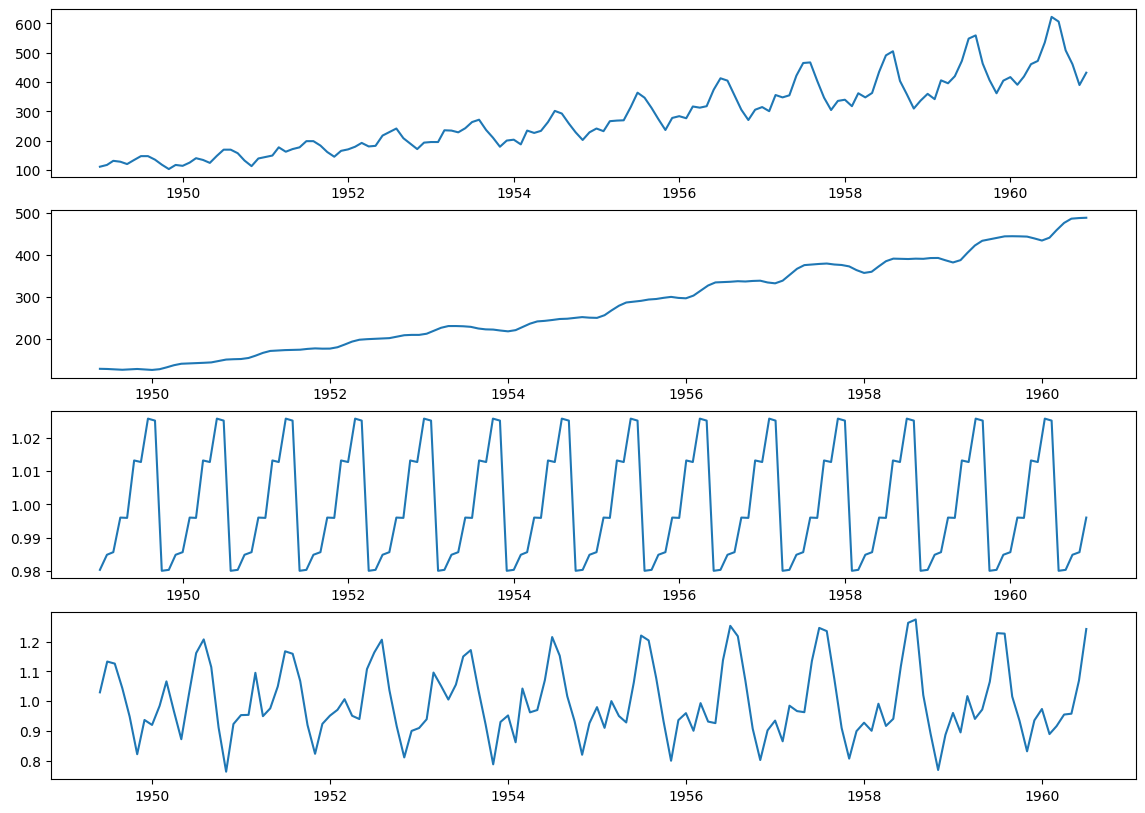

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df["Passengers"])
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residuals)
plt.show()

In [ ]:
sd = seasonal_decompose(stock_data["Close"], model = 'additive', period=10)

In [ ]:
trend = sd.trend
seasonal = sd.seasonal
residuals = sd.resid

In [ ]:
import matplotlib.pyplot as plt


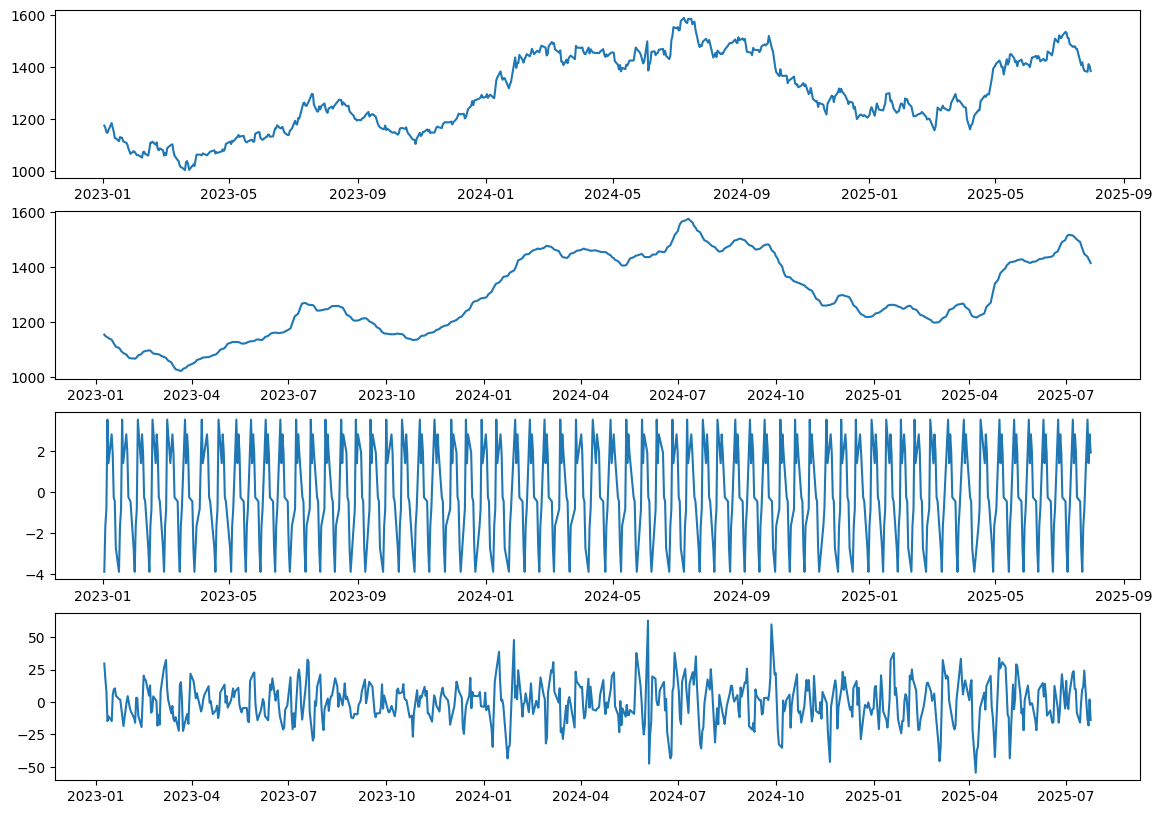

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'])
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residuals)
plt.show()

* Assume fixed seasonal patterns
* Easily influenced by the outliers
* Handle both additive and multiplicative mdoels
* Preferred for multiplicative models

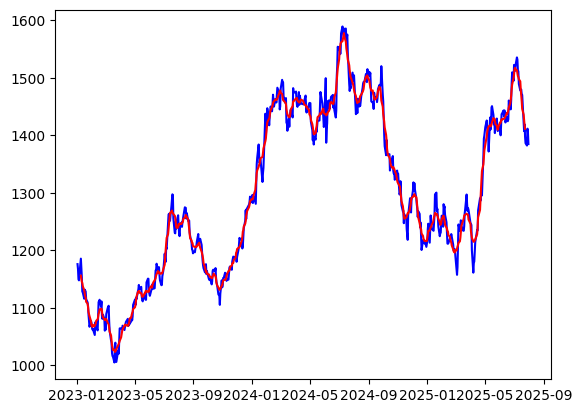

In [ ]:
import matplotlib.pyplot as plt

estimated  = trend + seasonal
plt.plot(stock_data["Close"], color = 'blue')
plt.plot(estimated, color='red')
plt.show()

In [ ]:
estimated.fillna(0)

,0
Date,
2023-01-02,0.0
2023-01-03,0.0
2023-01-04,0.0
2023-01-05,0.0
2023-01-06,0.0
...,...
2025-07-25,0.0
2025-07-28,0.0
2025-07-29,0.0


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(stock_data["Close"], estimated.fillna(0))


26045.52681221576